In [1]:
import requests 
import json 
import pandas 
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

# Création de la variable *hier* qui permet d'obtenir les données les plus récentes
today = date.today()
hier = today - timedelta(days=1)
hier = hier.strftime("%#m/%#d/%y")
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

#try:
   # r = requests.get(url)
   # r.raise_for_status()
#except requests.exceptions.RequestException as erreur:
#    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url, erreur))
#else: 

# Top 20 des pays avec le plus de cas confirmés
rawdatac = pandas.read_csv(url).fillna('N.D')
datac = rawdatac.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datac_sorted = datac.sort_values(by=hier, ascending = False)
datac_sorted_top = datac_sorted.head(20)
datac_final = datac_sorted_top.rename(columns= {hier: 'Confirmed'})
datac_final.reset_index()

,Country/Region,Province/State,Confirmed
0,US,N.D,366614
1,Spain,N.D,136675
2,Italy,N.D,132547
3,Germany,N.D,103374
4,France,N.D,98010
5,China,Hubei,67803
6,Iran,N.D,60500
7,United Kingdom,N.D,51608
8,Turkey,N.D,30217
9,Switzerland,N.D,21657


In [3]:
# Top 20 des pays ayant le plus de cas soignés

url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

rawdatar = pandas.read_csv(url2).fillna('N.D')
datar_group = rawdatar.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datar_group_sorted = datar_group.sort_values(by=hier, ascending = False)
datar_group_top = datar_group_sorted.head(20)

datar_final = datar_group_top.rename(columns= {hier: 'Recovered'})
datar_final

,,Recovered
Country/Region,Province/State,
China,Hubei,64014
Spain,N.D,40437
Germany,N.D,28700
Iran,N.D,24236
Italy,N.D,22837
US,N.D,19581
France,N.D,17250
Switzerland,N.D,8056
"Korea, South",N.D,6598


In [2]:
# Top 20 des pays ayant subit le plus de décès

url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

rawdatad = pandas.read_csv(url3).fillna('N.D')
datad_group = rawdatad.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datad_group_sorted = datad_group.sort_values(by=hier, ascending = False)
datad_group_top = datad_group_sorted.head(20)

datad_final = datad_group_top.rename(columns= {hier: 'Deaths'})
datad_final

,,Deaths
Country/Region,Province/State,
Italy,N.D,16523
Spain,N.D,13341
US,N.D,10783
France,N.D,8911
United Kingdom,N.D,5373
Iran,N.D,3739
China,Hubei,3212
Netherlands,N.D,1867
Germany,N.D,1810


In [4]:
# Renommer les colonnes avec la date de hier avec le type de cas observé

rawdatac_group = rawdatac.groupby(['Country/Region'])[[hier]].sum()
df_confirmed = rawdatac_group.rename(columns={hier:'Confirmed'})
df_confirmed1 = df_confirmed.reset_index()

rawdatad_group = rawdatad.groupby(['Country/Region'])[[hier]].sum()
df_deaths = rawdatad_group.rename(columns={hier:'Deaths'})
df_deaths1 = df_deaths.reset_index()

rawdatar_group = rawdatar.groupby(['Country/Region'])[[hier]].sum()
df_recovered = rawdatar_group.rename(columns={hier:'Recovered'})
df_recovered1 = df_recovered.reset_index()

# Jointures
# Jointure entre les données non filtrées de cas confirmés et nombre de morts
df_confirmed_deaths = df_confirmed1.join(df_deaths1.set_index('Country/Region'), on='Country/Region')

# Jointure entre les données non filtrées de cas guéris et la jointure précédemment créée
df_confirmed_deaths_recovered = df_confirmed_deaths.join(df_recovered1.set_index('Country/Region'), on='Country/Region')
df_final = df_confirmed_deaths_recovered.nlargest(10,columns='Confirmed')
df_final

,Country/Region,Confirmed,Deaths,Recovered
171,US,366614,10783,19581
156,Spain,136675,13341,40437
84,Italy,132547,16523,22837
65,Germany,103374,1810,28700
61,France,98963,8926,17428
36,China,82665,3335,77310
80,Iran,60500,3739,24236
175,United Kingdom,52279,5385,287
170,Turkey,30217,649,1326
161,Switzerland,21657,765,8056


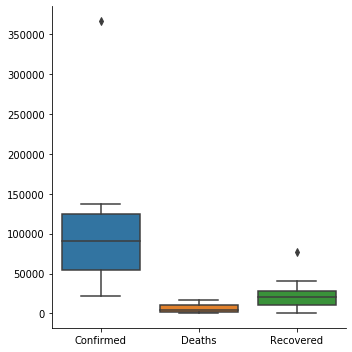

In [7]:
# Box and whiskers diagramme du top 20 des cas confirmés ainsi que leurs morts et cas soignés correspondants

import seaborn

seaborn.catplot(kind='box', data=df_final, orient="v")

In [8]:
# Petit texte qui mentionne les totaux pour chacun des types de cas observés

df_sum = df_confirmed_deaths_recovered.drop(columns='Country/Region')
df_sum_final = df_sum.sum()
print("En date du {0}:\n\n{1}".format(hier,df_sum_final))

En date du 4/6/20:

Confirmed    1345048
Deaths         74565
Recovered     276515
dtype: int64
